In [62]:
import pickle
import numpy as np

In [63]:
EDGE_OP = 'hadamard'
IS_WEIGHTED = 'unweighted'
RESULTS_BASE_PATH = 'save'

In [64]:
datasets = [
    {
        'name': 'fb_forum', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_contact', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_contacts_hypertext_2009', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_email_eu', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_enron_employees', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_radoslaw_email', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'soc_sign_bitcoin_alpha', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'wiki_elections', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    }
]

In [65]:
file_paths = [f'{RESULTS_BASE_PATH}/{dataset["name"]}_{dataset["edge_picker"]}_{dataset["init_picker"]}_{dataset["context_window_size"]}_{dataset["weighted_suffix"]}_{dataset["edge_op"]}_{dataset["is_directed"]}.pkl' for dataset in datasets]

In [66]:
mean_aucs = []
mean_walk_times = []

for file_path in file_paths:
    result_for_dataset = pickle.load(open(file_path, 'rb'))
    
    mean_aucs.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['auc_scores']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['auc_scores']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['auc_scores'])
    })
    
    mean_walk_times.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['walk_times']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['walk_times']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['walk_times'])
    })

In [67]:
auc_new_temporal = [entry['new_temporal'] for entry in mean_aucs]
auc_old_temporal = [entry['old_temporal'] for entry in mean_aucs]
auc_node2vec = [entry['node2vec'] for entry in mean_aucs]

walk_new_temporal = [entry['new_temporal'] for entry in mean_walk_times]
walk_old_temporal = [entry['old_temporal'] for entry in mean_walk_times]
walk_node2vec = [entry['node2vec'] for entry in mean_walk_times]

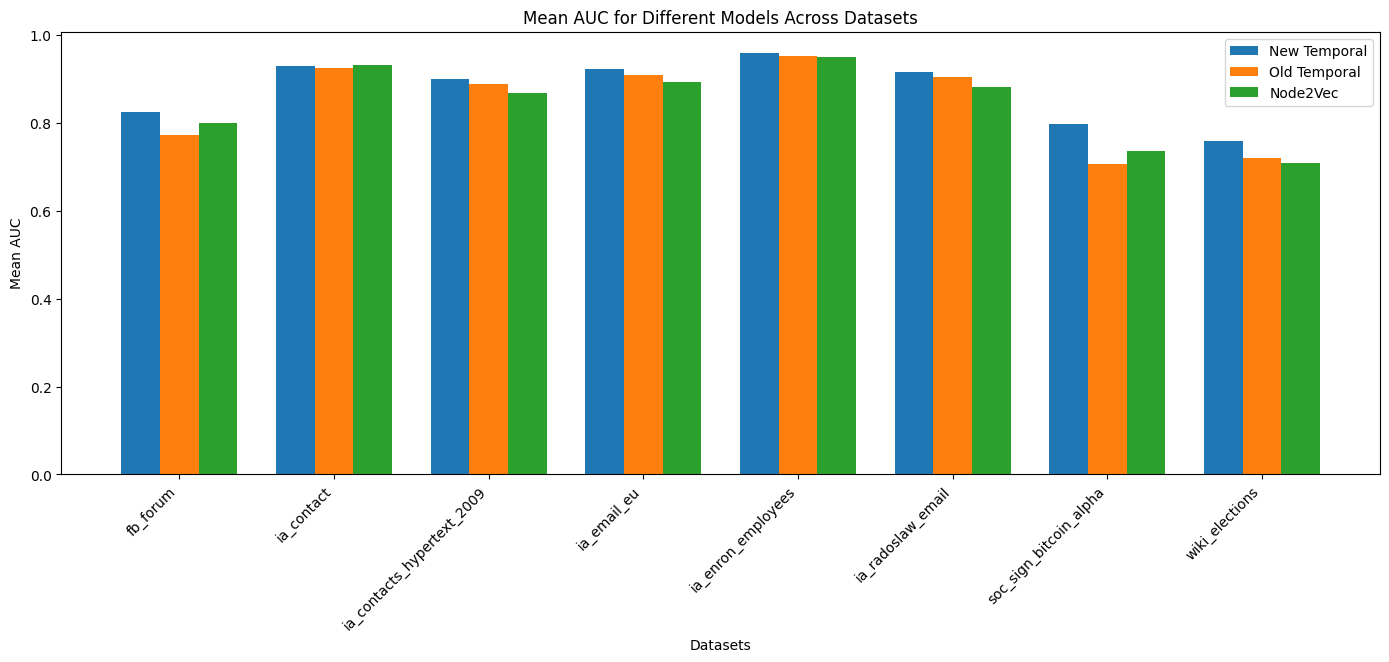

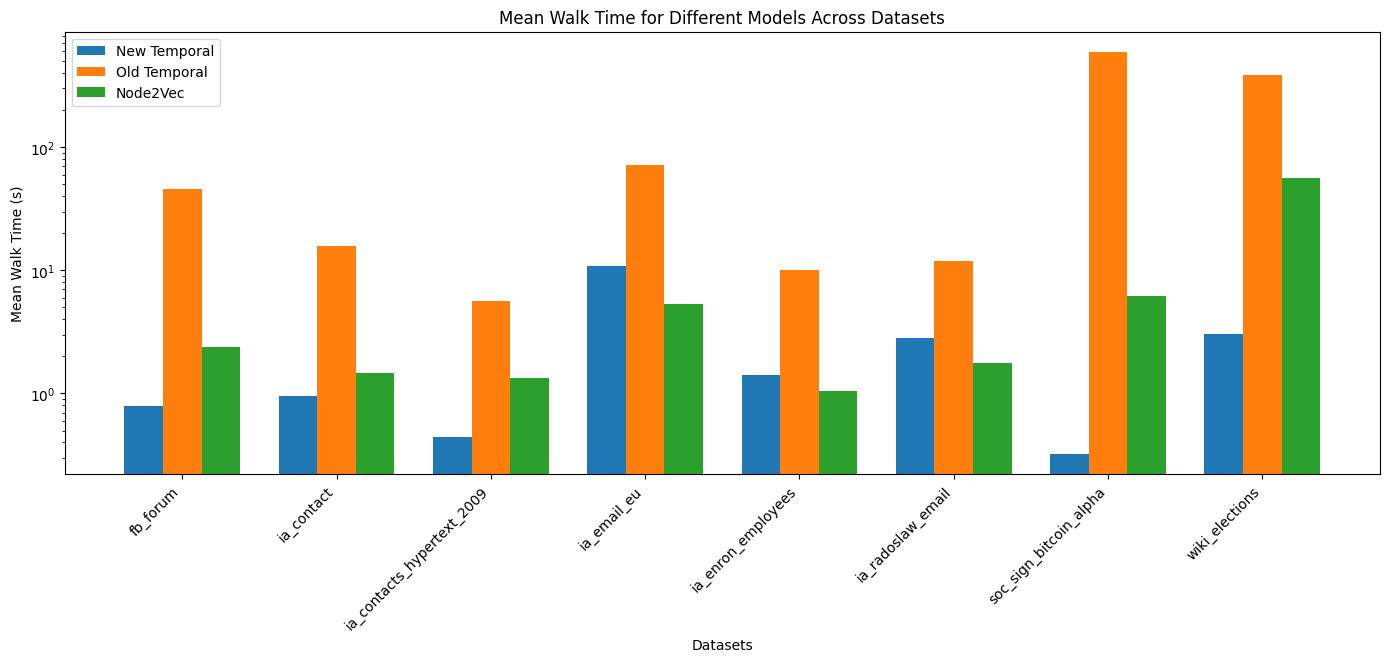

In [68]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
dataset_names = [dataset['name'] for dataset in datasets]
x = np.arange(len(datasets))

# Plotting AUC bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, auc_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, auc_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, auc_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean AUC')
plt.title('Mean AUC for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

# Plotting Walk Time bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, walk_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, walk_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, walk_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean Walk Time (s)')
plt.title('Mean Walk Time for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

In [69]:
import pandas as pd

auc_df = pd.DataFrame({
    'Dataset': dataset_names,
    'AUC_New_Temporal': auc_new_temporal,
    'AUC_Old_Temporal': auc_old_temporal,
    'AUC_Node2Vec': auc_node2vec,
})

auc_df = auc_df.round(2)

walk_time_df = pd.DataFrame({
    'Dataset': dataset_names,
    'WalkTime_New_Temporal': walk_new_temporal,
    'WalkTime_Old_Temporal': walk_old_temporal,
    'WalkTime_Node2Vec': walk_node2vec
})

walk_time_df = walk_time_df.round(2)

In [70]:
auc_df

,Dataset,AUC_New_Temporal,AUC_Old_Temporal,AUC_Node2Vec
0,fb_forum,0.83,0.77,0.80
1,ia_contact,0.93,0.92,0.93
2,ia_contacts_hypertext_2009,0.90,0.89,0.87
3,ia_email_eu,0.92,0.91,0.89
4,ia_enron_employees,0.96,0.95,0.95
5,ia_radoslaw_email,0.92,0.91,0.88
6,soc_sign_bitcoin_alpha,0.80,0.71,0.74
7,wiki_elections,0.76,0.72,0.71


In [71]:
walk_time_df

,Dataset,WalkTime_New_Temporal,WalkTime_Old_Temporal,WalkTime_Node2Vec
0,fb_forum,0.79,45.46,2.40
1,ia_contact,0.96,15.81,1.46
2,ia_contacts_hypertext_2009,0.44,5.62,1.33
3,ia_email_eu,10.82,71.73,5.37
4,ia_enron_employees,1.42,10.04,1.06
5,ia_radoslaw_email,2.79,11.88,1.76
6,soc_sign_bitcoin_alpha,0.32,593.93,6.23
7,wiki_elections,3.01,388.72,56.51


In [72]:
alternate_datasets = [
    {
        'name': 'ia_contact',
        'alias': 'contact',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_contacts_hypertext_2009', 
        'alias': 'hyper',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_enron_employees', 
        'alias': 'enron',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_radoslaw_email',
        'alias': 'rado',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    }
]

In [73]:
alternate_dataset_results = {}

for dataset in alternate_datasets:
    dataset_name = dataset['name']
    dataset_result = {}
    
    for variant in dataset['variants']:
        file_path = f'{RESULTS_BASE_PATH}/{dataset_name}_{variant["edge_picker"]}_{variant["init_picker"]}_{variant["context_window_size"]}_{variant["weighted_suffix"]}_{variant["edge_op"]}_{variant["is_directed"]}.pkl'
        result_for_variant = pickle.load(open(file_path, 'rb'))
        dataset_result[f'{variant["init_picker"]}_{variant["edge_picker"]}'] = {
            'new_temporal': np.mean(result_for_variant['metrics']['new_temporal']['auc_scores']),
            'old_temporal': np.mean(result_for_variant['metrics']['old_temporal']['auc_scores']),
            'node2vec': np.mean(result_for_variant['metrics']['node2vec']['auc_scores'])
        }
        
    alternate_dataset_results[dataset['alias']] = dataset_result

In [74]:
import pandas as pd

table_rows = []

for dataset_name, variants in alternate_dataset_results.items():
    for variant_name, metrics in variants.items():
        init_picker, edge_picker = variant_name.split('_')
        
        table_rows.append({
            'F_s': init_picker,
            'F_Gamma': edge_picker,
            f'{dataset_name} (New)': round(metrics['new_temporal'], 3),
            f'{dataset_name} (Old)': round(metrics['old_temporal'], 3),
        })

df = pd.DataFrame(table_rows)

df = df.groupby(['F_s', 'F_Gamma'], as_index=False).first()

In [75]:
df

,F_s,F_Gamma,contact (New),contact (Old),hyper (New),hyper (Old),enron (New),enron (Old),rado (New),rado (Old)
0,Linear,Linear,0.948,0.929,0.900,0.898,0.967,0.957,0.935,0.924
1,Linear,Uniform,0.958,0.931,0.907,0.896,0.973,0.960,0.949,0.924
2,Uniform,Linear,0.950,0.927,0.903,0.898,0.969,0.960,0.937,0.925
3,Uniform,Uniform,0.959,0.931,0.905,0.899,0.966,0.956,0.952,0.921


In [76]:
alibaba_dataset = {
    'name': 'alibaba', 
    'context_window_size': 10, 
    'init_picker': 'Uniform', 
    'edge_picker': 'Exponential',
    'weighted_suffix': 'unweighted', 
    'edge_op': 'hadamard', 
    'is_directed': 'directed'
}

In [77]:
alibaba_filepath = f'save/{alibaba_dataset["name"]}_{alibaba_dataset["edge_picker"]}_{alibaba_dataset["init_picker"]}_{alibaba_dataset["context_window_size"]}_{alibaba_dataset["weighted_suffix"]}_{alibaba_dataset["edge_op"]}_{alibaba_dataset["is_directed"]}.pkl'
alibaba_results_data = pickle.load(open(alibaba_filepath, 'rb'))

In [78]:
alibaba_results = {
    'AUC': {
        'new_temporal': np.mean(alibaba_results_data['metrics']['new_temporal']['auc_scores']),
        'old_temporal': np.mean(alibaba_results_data['metrics']['old_temporal']['auc_scores']),
        'node2vec': np.mean(alibaba_results_data['metrics']['node2vec']['auc_scores'])
    },
    'Walk Times': {
        'new_temporal': np.mean(alibaba_results_data['metrics']['new_temporal']['walk_times']),
        'old_temporal': np.mean(alibaba_results_data['metrics']['old_temporal']['walk_times']),
        'node2vec': np.mean(alibaba_results_data['metrics']['node2vec']['walk_times'])
    }
}

In [79]:
alibaba_df = pd.DataFrame(alibaba_results).T

In [80]:
alibaba_df

,new_temporal,old_temporal,node2vec
AUC,0.981842,0.500000,0.957631
Walk Times,32.954665,16533.862519,3.037064
